### Import the required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

### Import the train & test dataset

In [2]:
train_df = pd.read_csv(r'C:\Users\hai\Downloads\train\Mercedes_train.csv')
test_df = pd.read_csv(r'C:\Users\hai\Downloads\test\Mercedes_test.csv')

#### View the dataset

In [3]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


#### View the shape of the dataset(no.of rows & no.of columns)

In [5]:
train_df.shape

(4209, 378)

In [6]:
test_df.shape

(4209, 377)

#### *There are 378 columns in Train dataset with X features named X0,X1,X2,X3,....X385 & y target named y.
#### *There are 377 columns in Test dataset with only X features named X0,X1,X2,X3,....X385.

#### Find the datatype of each column in the dataset and find its total count

In [7]:
train_df.dtypes.value_counts()

int64      369
object       8
float64      1
dtype: int64

In [8]:
test_df.dtypes.value_counts()

int64     369
object      8
dtype: int64

#### *There are 369 integer columns, 8 object columns & 1 float column in train dataset.
#### *There are 369 integer columns & 8 object columns in test dataset.

#### Find if there is any null values in the dataset

In [9]:
train_df.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [10]:
test_df.isnull().sum()

ID      0
X0      0
X1      0
X2      0
X3      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 377, dtype: int64

#### *There are no null values in both the train & test dataset.

### Find the unique values in both the datasets.

In [11]:
for col in train_df:
    print(col, train_df[col].unique())
for col in test_df:
    print(col, test_df[col].unique())

ID [   0    6    7 ... 8412 8415 8417]
y [130.81  88.53  76.26 ...  85.71 108.77  87.48]
X0 ['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
X1 ['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
X2 ['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
X3 ['a' 'e' 'c' 'f' 'd' 'b' 'g']
X4 ['d' 'b' 'c' 'a']
X5 ['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
X6 ['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b']
X8 ['o' 'x' 'e' 'n' 's' 'a' 'h' 'p' 'm' 'k' 'd' 'i' 'v' 'j' 'b' 'q' 'w' 'g'
 'y' 'l' 'f' 'u' 'r' 't' 'c']
X10 [0 1]
X11 [0]
X12 [0 1]
X13

#### * From the above we can see that there are unique values in all the categorical columns.
#### * Some columns have values as zero only ; they have zero variance.

### Apply Label Encoder.

In [12]:
label_encoder = LabelEncoder()

In [13]:
columns_to_be_encoded = ['X0','X1','X2','X3','X4','X5','X6','X8']

for column in columns_to_be_encoded:
    train_df[column] = label_encoder.fit_transform(train_df[column])
    test_df[column] = label_encoder.fit_transform(test_df[column])

In [14]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,32,23,17,0,3,24,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,32,21,19,4,3,28,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,20,24,34,2,3,27,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,20,21,34,5,3,27,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,20,23,34,5,3,12,3,13,...,0,0,0,0,0,0,0,0,0,0


#### Check if all the features have changed to numerical ones.

In [15]:
train_df.dtypes.value_counts()

int64      369
int32        8
float64      1
dtype: int64

In [16]:
test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,21,23,34,5,3,26,0,22,0,...,0,0,0,1,0,0,0,0,0,0
1,2,42,3,8,0,3,9,6,24,0,...,0,0,1,0,0,0,0,0,0,0
2,3,21,23,17,5,3,0,9,9,0,...,0,0,0,1,0,0,0,0,0,0
3,4,21,13,34,5,3,31,11,13,0,...,0,0,0,1,0,0,0,0,0,0
4,5,45,20,17,2,3,30,8,12,0,...,1,0,0,0,0,0,0,0,0,0


In [17]:
test_df.dtypes.value_counts()

int64    369
int32      8
dtype: int64

#### Identify features with 0 variance.

In [18]:
Zero_Var_cols = []
for col in train_df.columns:
    if train_df[col].var()==0:
        Zero_Var_cols.append(col)
        
print('No. of features in train data that has zero variance: ',len(Zero_Var_cols))
print('List of features in train data that has zero variance: ',Zero_Var_cols)

No. of features in train data that has zero variance:  12
List of features in train data that has zero variance:  ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']


<AxesSubplot:xlabel='X8', ylabel='y'>

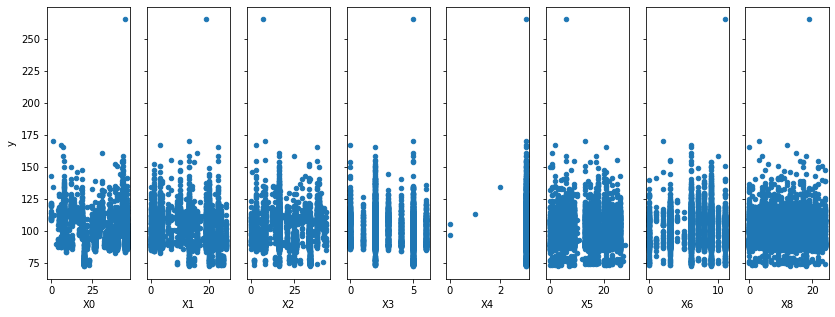

In [19]:
fig,axs = plt.subplots(1,8,sharey = True)
train_df.plot(kind='scatter', x='X0',y='y',ax=axs[0],figsize=(14,5))
train_df.plot(kind='scatter', x='X1',y='y',ax=axs[1])
train_df.plot(kind='scatter', x='X2',y='y',ax=axs[2])
train_df.plot(kind='scatter', x='X3',y='y',ax=axs[3])
train_df.plot(kind='scatter', x='X4',y='y',ax=axs[4])
train_df.plot(kind='scatter', x='X5',y='y',ax=axs[5])
train_df.plot(kind='scatter', x='X6',y='y',ax=axs[6])
train_df.plot(kind='scatter', x='X8',y='y',ax=axs[7])

* From the above plots we can see that the X4 feature is also having very low variance, hence this feature can also be removed.

#### Remove the features with zero & very low variance from the dataset.

In [20]:
train_df.drop(['X4','X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347'], axis =1, inplace=True)

#### Remove the same columns from test dataset.


In [21]:
test_df.drop(['X4','X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347'], axis =1, inplace=True)

In [22]:
train_df.shape

(4209, 365)

In [23]:
test_df.shape

(4209, 364)

#### * There are 12 features with zero variance & 1 feature with very low variance and they have been removed from the train & test datasets.

### Check for any outliers by visualization.


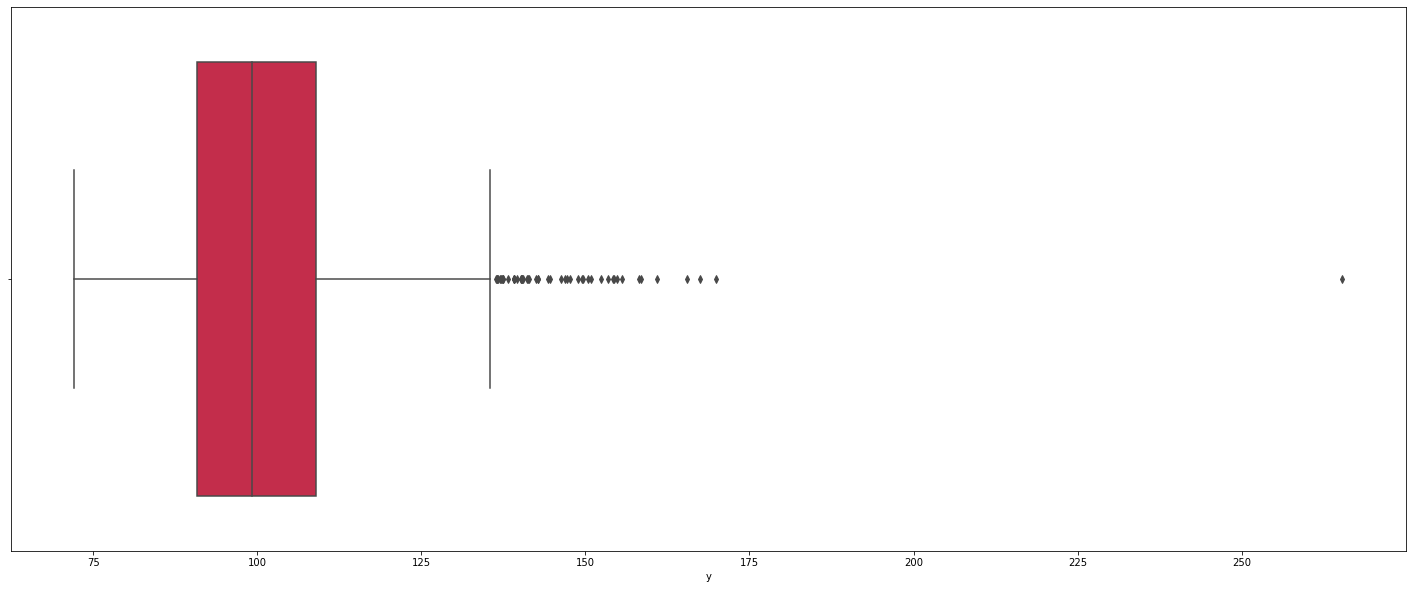

In [24]:
plt.figure(figsize=(25,10))
sns.boxplot(x='y', data=train_df, color='crimson')
plt.show()

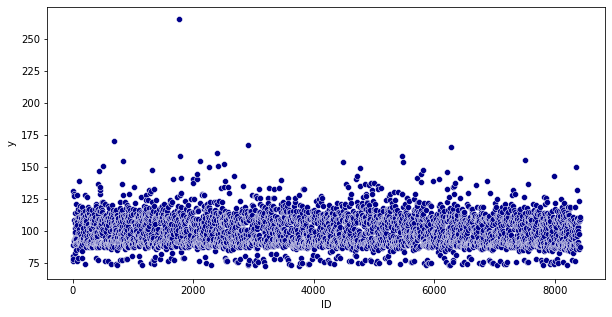

In [25]:
plt.figure(figsize=(10,5))
sns.scatterplot(x= train_df['ID'], y=train_df['y'], color='darkblue')
plt.show()

#### *It can be seen that there are some outliers in the data that needs to be handled.

#### Using percentile method to detect and remove the outliers.

In [26]:
max_threshold = train_df['y'].quantile(0.999)
max_threshold

160.38328000000087

In [27]:
outliers = train_df[train_df['y']>max_threshold]
outliers

,ID,y,X0,X1,X2,X3,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
342,681,169.91,1,13,8,5,13,2,3,0,...,0,0,0,0,0,0,0,0,0,0
883,1770,265.32,45,19,7,5,6,11,19,0,...,0,0,0,0,0,0,0,0,0,0
1203,2396,160.87,31,16,16,5,1,6,15,0,...,1,0,0,0,0,0,0,0,0,0
1459,2903,167.45,6,3,3,0,2,6,12,0,...,0,0,1,0,0,0,0,0,0,0
3133,6273,165.52,7,23,38,2,21,6,0,0,...,0,0,1,0,0,0,0,0,0,0


In [28]:
outliers.index

Int64Index([342, 883, 1203, 1459, 3133], dtype='int64')

In [29]:
train_df.drop(index=outliers.index, inplace=True)

In [30]:
train_df.shape

(4204, 365)

#### * Outliers have been removed.

#### Drop 'ID' from bot the datasets as it is not required for analysis.

In [31]:
train = train_df.drop(['y','ID',], axis = 1)
test = test_df.drop(['ID'], axis = 1)

### Perform dimensionality reduction using PCA

In [32]:
pca = PCA(n_components=10, random_state=21)
train_pca = pca.fit_transform(train)
test_pca = pca.transform(test)

In [33]:
print(train_pca.shape)
print(test_pca.shape)

(4204, 10)
(4209, 10)


In [34]:
pca.explained_variance_ratio_

array([0.38314616, 0.21388272, 0.13266609, 0.11832022, 0.09213316,
       0.01591696, 0.00744662, 0.00433802, 0.0029445 , 0.00241956])

#### Splitting the dataset to X & y

In [35]:
x_train = train_pca
y_train = train_df['y']

#### Splitting the train dataset into train & validation dataset

In [36]:
X_train, X_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2, random_state = 121)

In [37]:
print("Shape of X_train is : ",X_train.shape)
print("Shape of X_valid is : ",X_valid.shape)
print("Shape of y_train is : ",y_train.shape)
print("Shape of y_valid is : ",y_valid.shape)

Shape of X_train is :  (3363, 10)
Shape of X_valid is :  (841, 10)
Shape of y_train is :  (3363,)
Shape of y_valid is :  (841,)


In [38]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


#### Import Xgboost library for modelling

In [39]:
import xgboost as xgb

xgbr = xgb.XGBRegressor(booster = 'gbtree', gamma=3, min_child_weight = 5, max_depth = 5, eta=0.2)
xgbr

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.2, eval_metric=None, gamma=3,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=5, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, ...)

In [40]:
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.2,
             eval_metric=None, gamma=3, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.200000003, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=5,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0, ...)

### Predict the output of fitting the xgboost model on the tran & test dataset.

In [41]:
y_train_pred = xgbr.predict(X_train)

In [42]:
y_valid_pred = xgbr.predict(X_valid)

### Calculate the R2 score

In [43]:
print("R2 score of the XGBoost model on the train dataset is : ")
print(xgbr.score(X_train, y_train))

R2 score of the XGBoost model on the train dataset is : 
0.7889327790409493


In [44]:
print("R2 score of the XGBoost model on the test dataset is : ")
print(xgbr.score(X_valid, y_valid))

R2 score of the XGBoost model on the test dataset is : 
0.41902757259506385


### Calculate the RMSE value of the model.

In [45]:
from sklearn.metrics import mean_squared_error
print("RMSE value of the train dataset is: ")
print(np.sqrt(mean_squared_error(y_train,y_train_pred)))

RMSE value of the train dataset is: 
5.653590195114792


In [46]:
print("RMSE value of the validation dataset is: ")
print(np.sqrt(mean_squared_error(y_valid,y_valid_pred)))

RMSE value of the validation dataset is: 
9.215364123519379


### Predict the test dataset values using XGBoost.

In [47]:
test_pred = xgbr.predict(test_pca)
Predicted_Data = pd.DataFrame()
Predicted_Data['y'] = test_pred
Predicted_Data.head()

,y
0,81.167282
1,88.325836
2,91.111420
3,78.945305
4,114.523598
